**DATA VISUALIZATION OF BASE MODELS RESULTS AFTER PARAMETER OPTIMIZATION**

In [2]:
import pandas as pd
import numpy as np

f1score_rf = pd.read_csv("weighted_f1_rf.csv", sep='\,', engine='python')
f1score_nn = pd.read_csv("weighted_f1_nn.csv", sep='\,', engine='python')
f1score_gb = pd.read_csv("weighted_f1_gb.csv", sep='\,', engine='python')

f1score_rf_params = pd.read_csv("weighted_f1_rf_params.csv", sep='\,', engine='python')
f1score_nn_params = pd.read_csv("weighted_f1_nn_params.csv", sep='\,', engine='python')
f1score_gb_params = pd.read_csv("weighted_f1_gb_params.csv", sep='\,', engine='python')

In [3]:
print(f"Gradient Boosting V2 Mean Weighted F1-Score: {np.mean(f1score_gb_params['score'])}")
print(f"Gradient Boosting V1 Mean Weighted F1-Score: {np.mean(f1score_gb['score'])}\n")

print(f"Neural Networks V2 Mean Weighted F1-Score:   {np.mean(f1score_nn_params['score'])}")
print(f"Neural Networks V1 Mean Weighted F1-Score:   {np.mean(f1score_nn['score'])}\n")

print(f"Random Forest V2 Mean Weighted F1-Score:     {np.mean(f1score_rf_params['score'])}")
print(f"Random Forest V1 Mean Weighted F1-Score:     {np.mean(f1score_rf['score'])}")

Gradient Boosting V2 Mean Weighted F1-Score: 0.6554794802906446
Gradient Boosting V1 Mean Weighted F1-Score: 0.6389097766681082

Neural Networks V2 Mean Weighted F1-Score:   0.6057083712406768
Neural Networks V1 Mean Weighted F1-Score:   0.5808108262467909

Random Forest V2 Mean Weighted F1-Score:     0.5898469326406898
Random Forest V1 Mean Weighted F1-Score:     0.5739477552752065


In [4]:
sorted_base_scores = [f1score_rf['score'],
                      f1score_rf_params['score'],
                      f1score_nn['score'],
                      f1score_nn_params['score'],
                      f1score_gb['score'],
                      f1score_gb_params['score']
                     ]

sorted_base_names = ["RF V1",
                     "RF V2",
                     "NN V1",
                     "NN V2",
                     "GB V1",
                     "GB V2"
                    ]

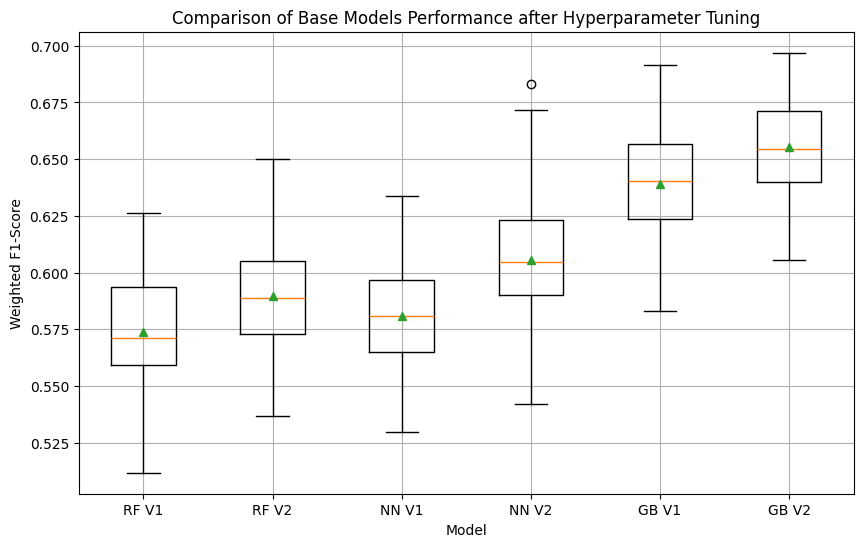

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))
plt.boxplot(sorted_base_scores, tick_labels = sorted_base_names, showmeans = True)
plt.title('Comparison of Base Models Performance after Hyperparameter Tuning')
plt.ylabel('Weighted F1-Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

#fig.savefig('comparisonBaseModelsParams.png')

**PLOT BASE MODELS WITH TIME**

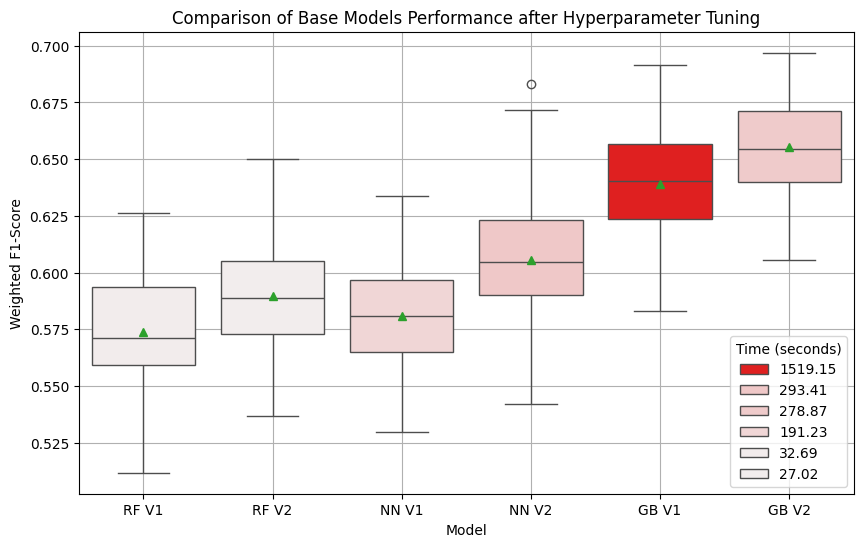

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": np.repeat(sorted_base_names, 102),
    "Score": np.concatenate(sorted_base_scores),
    "Time": np.concatenate([np.repeat(32.69, 102),
                            np.repeat(27.02, 102),
                            np.repeat(191.23, 102),
                            np.repeat(293.41, 102),
                            np.repeat(1519.15, 102),
                            np.repeat(278.87, 102)]
                         )
}

df = pd.DataFrame(data)

# Plotting with Seaborn



fig = plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Model",
    y="Score",
    hue="Time",
    palette="light:#F00",
    hue_norm=(0, df["Time"].max()), # df["Time"].min(), df["Time"].max()
    dodge=False,
    showmeans = True
)

# Add title and labels
plt.title("Comparison of Base Models Performance after Hyperparameter Tuning")
plt.ylabel("Weighted F1-Score")
plt.xlabel("Model")

# Add colorbar
# sm = plt.cm.ScalarMappable(cmap= sns.color_palette("light:#F00", as_cmap=True), norm=plt.Normalize(vmin=0, vmax=df["Time"].max()))
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical")
# cbar.set_label("Time (seconds)")

#plt.legend([],[], frameon=False)

plt.legend(reverse = True, title = "Time (seconds)", loc = "lower right")

plt.grid(True)
plt.show()

#fig.savefig('comparisonBaseModelsParamsTime.png')

**Distribution of F1-Score from the two Gradient Boosting Models**

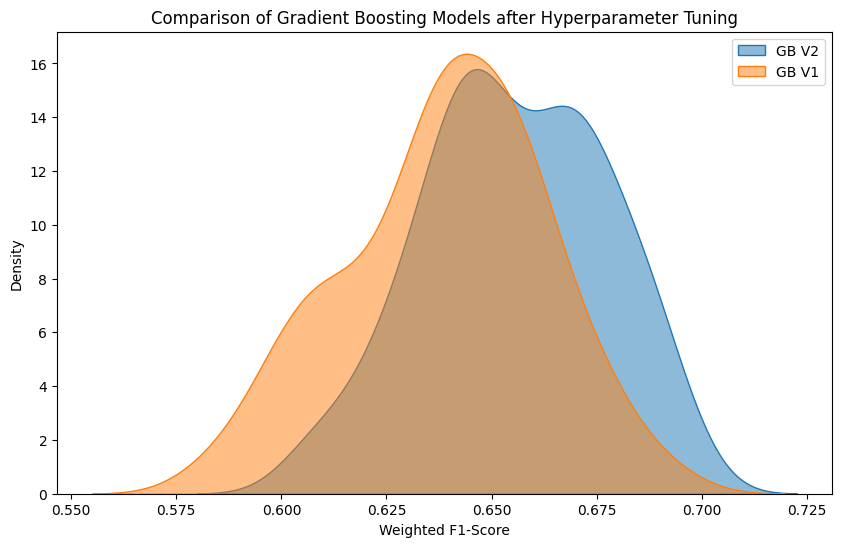

In [13]:
"""
# Calculate min, mean, max, and standard deviation
min_val = f1score_gb_params['score'].min()
mean_val = f1score_gb_params['score'].mean()
max_val = f1score_gb_params['score'].max()
std_val = f1score_gb_params['score'].std()
"""

# Create the density plot
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(f1score_gb_params['score'], label = "GB V2", fill=True, alpha=0.5)
sns.kdeplot(f1score_gb['score'], label = "GB V1", fill=True, alpha=0.5)

"""
# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val:.4f}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.4f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val:.4f}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.4f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.4f}')
"""

plt.title('Comparison of Gradient Boosting Models after Hyperparameter Tuning')
plt.xlabel('Weighted F1-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#fig.savefig('GBModelsParams.png')